In [1]:
%run ../draw_functions.py
%run ../kstest.py

In [2]:
from draw_functions import *
from kstest import *

In [3]:
#read csv
df = pd.read_csv('../csv/MX324041021M601.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,1E126FF0-3D63-4DA5-8976-004160B3DCE3,0.011667,1.299328,221806D,O3A06YLQS,NaN
1,1E126FF0-3D63-4DA5-8976-004160B3DCE3,0.021667,1.852954,221806D,O3A06YLQS,55.362652
2,1E126FF0-3D63-4DA5-8976-004160B3DCE3,0.031667,1.717372,221806D,O3A06YLQS,-13.558201
3,1E126FF0-3D63-4DA5-8976-004160B3DCE3,0.039667,1.617945,221806D,O3A06YLQS,-12.428351
4,1E126FF0-3D63-4DA5-8976-004160B3DCE3,0.041667,1.593089,221806D,O3A06YLQS,-12.428351
...,...,...,...,...,...,...
11310,4F0808AA-E27D-40B8-9BDF-C560914B00F5,0.548333,18.947585,232317D,O3A09X755,33.864547
11311,4F0808AA-E27D-40B8-9BDF-C560914B00F5,0.559067,19.274187,232317D,O3A09X755,30.428757
11312,4F0808AA-E27D-40B8-9BDF-C560914B00F5,0.578333,19.817570,232317D,O3A09X755,28.203247
11313,4F0808AA-E27D-40B8-9BDF-C560914B00F5,0.599000,20.353119,232317D,O3A09X755,25.913658


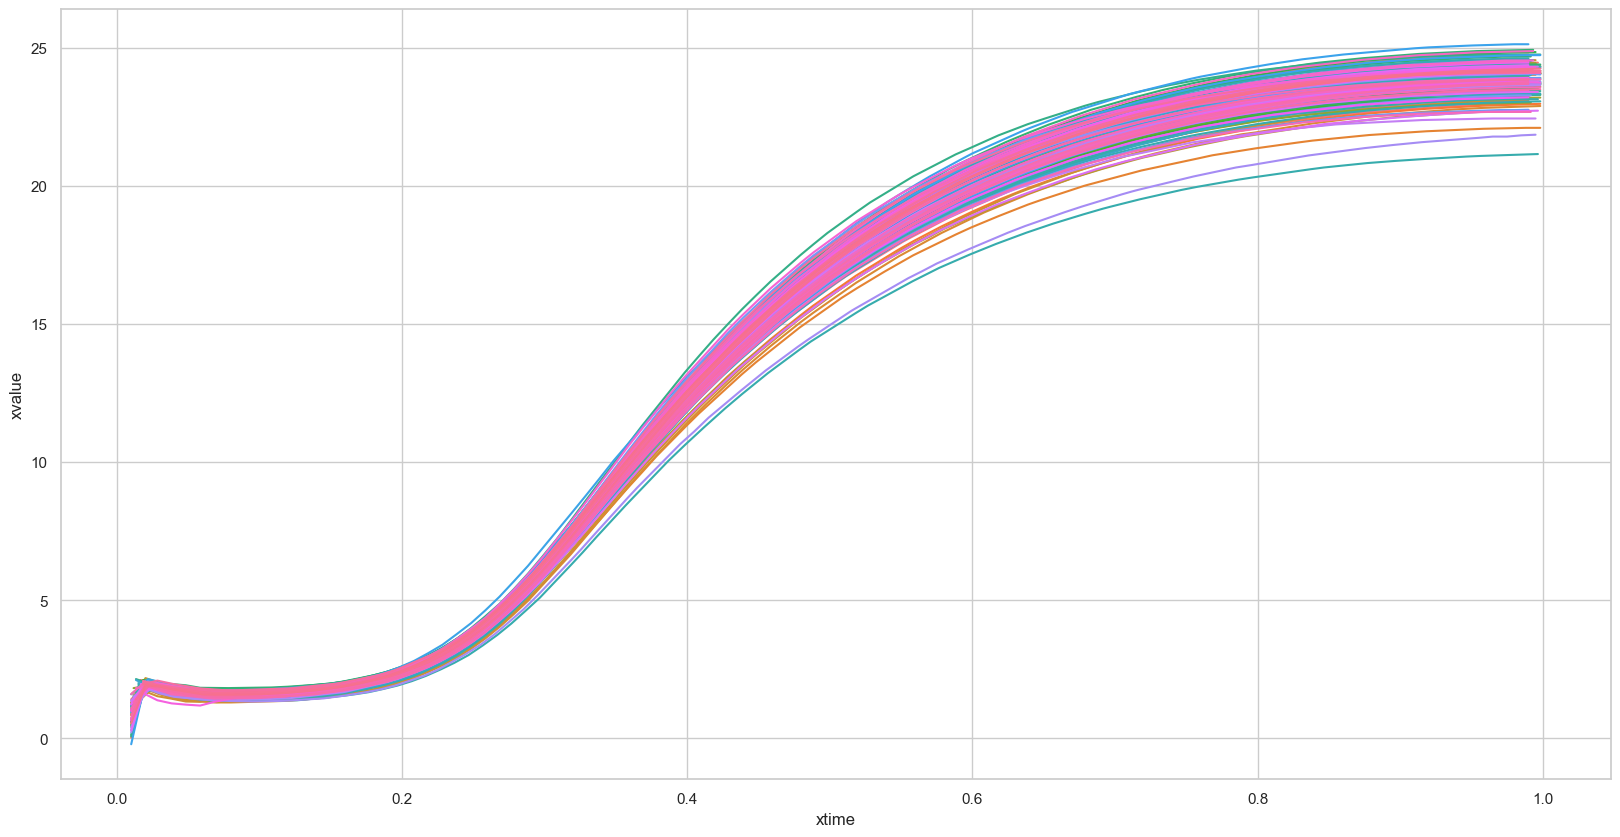

In [5]:
dessiner_commande(df)

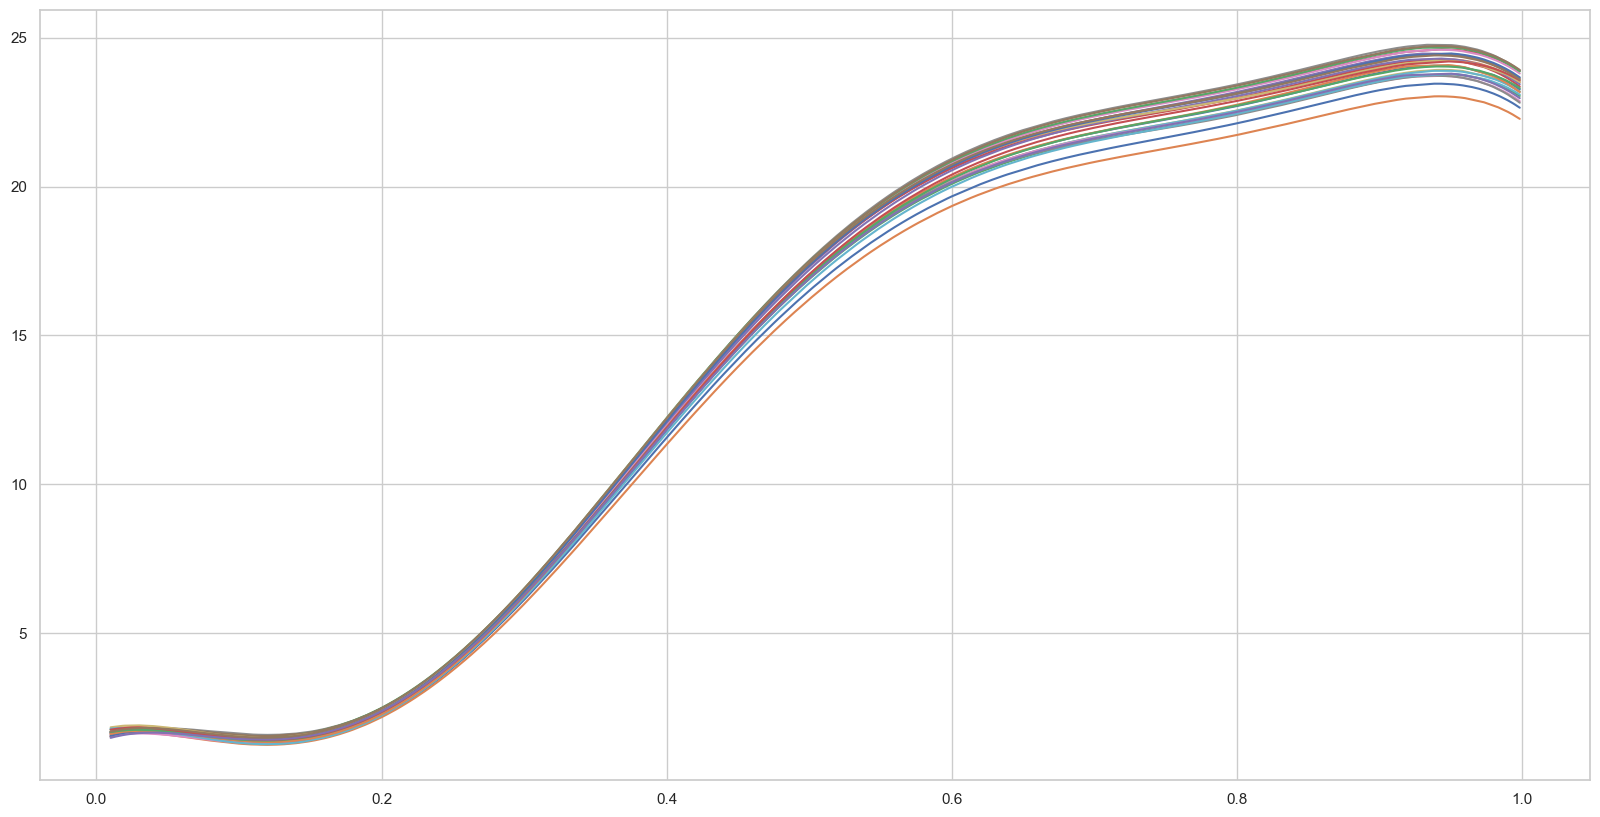

In [6]:
dessiner_commande(df,degree=6)

## Analyse des pentes

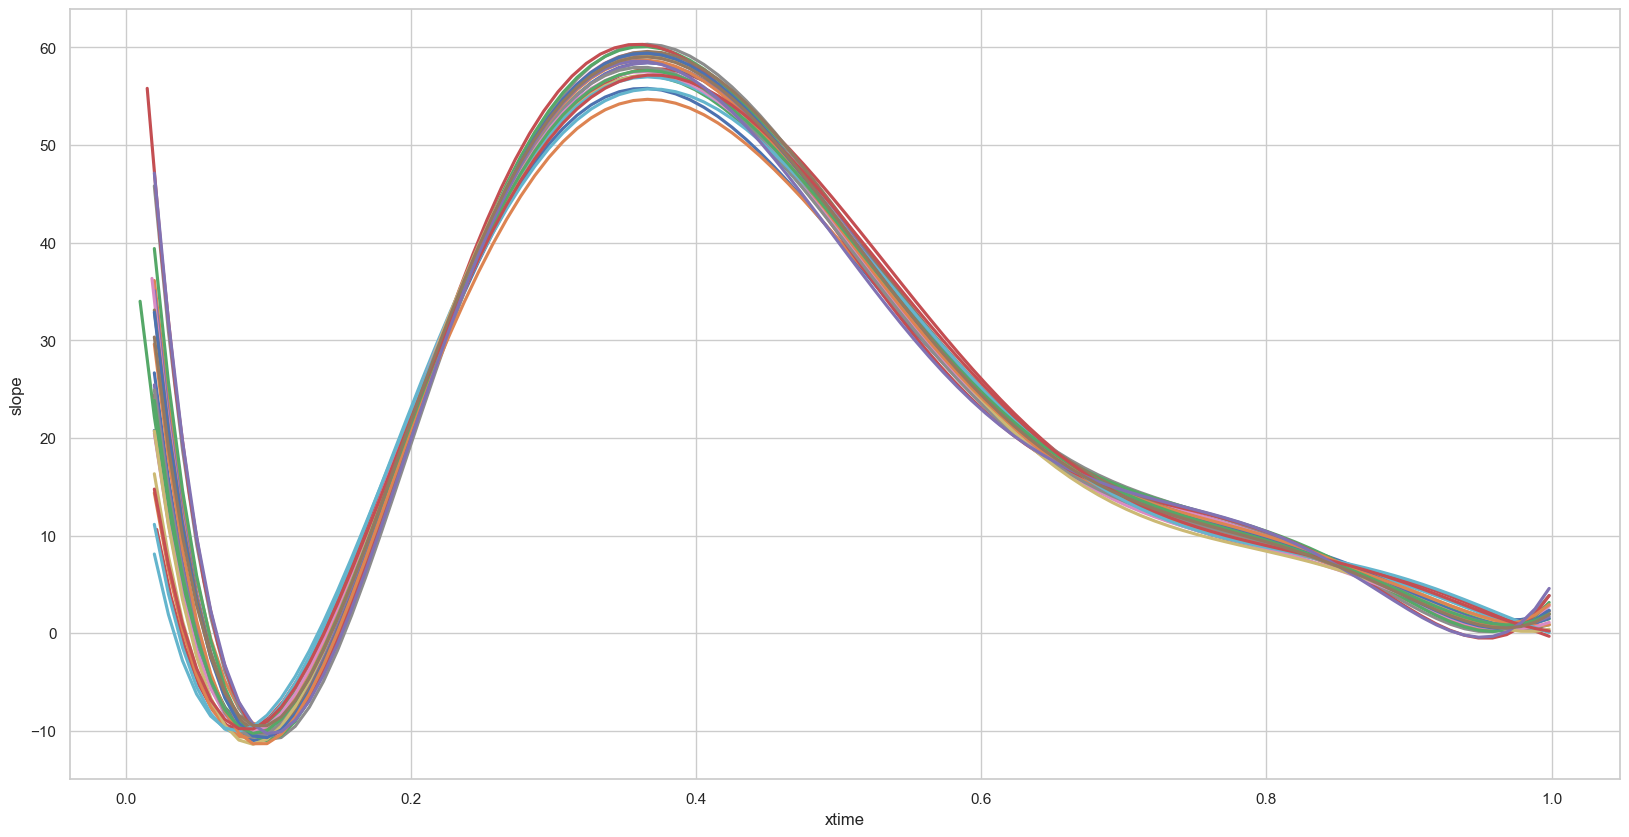

In [8]:
dessiner_commande_slope(df, 6 ,unified=True)

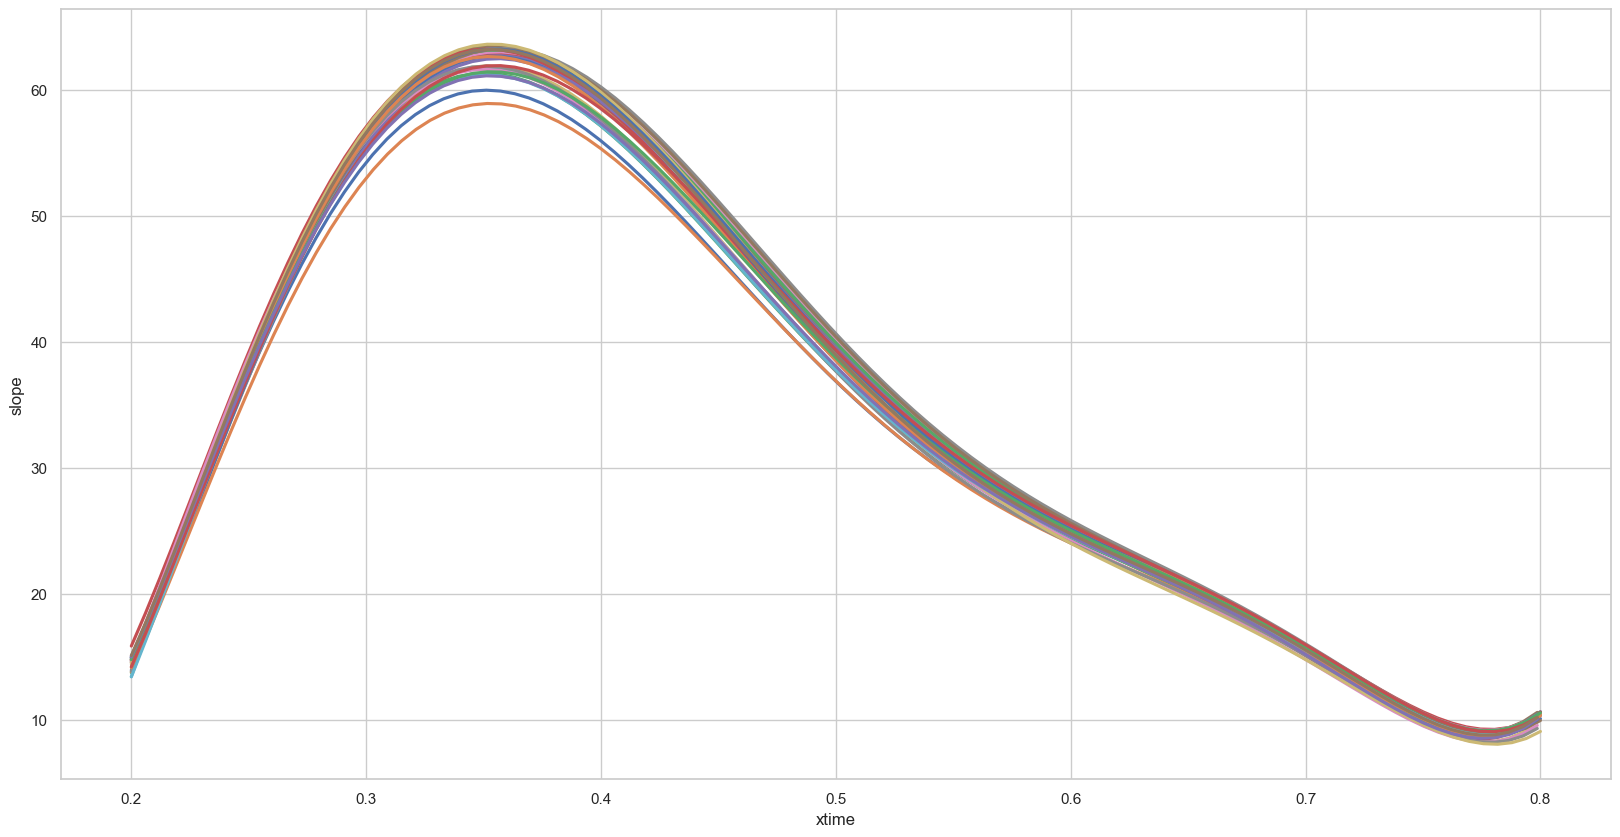

In [9]:
dessiner_commande_slope(df_02_08, 6 ,unified=True)

- Batch 215402D: 2.8961385716549173
- Batch 224110D: 2.3572965345569865
- Batch 221806D: 2.234929757261222
- Batch 221205D: 1.6191572462795818
- Batch 233519D: 1.5544571157416456
- Batch 222908D: 1.1284278049319458
- Batch 234120D: 1.112562750676405
- Batch 225913D: 1.1116009044766746
- Batch 001125D: 1.063272933744809
- Batch 222407D: 0.9998897844577785
- Batch 214801D: 0.9643268836624339
- Batch 001826D: 0.9560131640069125
- Batch 220003D: 0.8657861156704136
- Batch 231716D: 0.8078100673527684
- Batch 230514D: 0.7729498441130405
- Batch 223609D: 0.7289383199776697
- Batch 220604D: 0.7076493308316621
- Batch 235923D: 0.6949286265174838
- Batch 232918D: 0.6869789132508751
- Batch 234721D: 0.6677092153934272
- Batch 235322D: 0.6645662597124187
- Batch 231115D: 0.6288738951343671
- Batch 000524D: 0.5932306709265267
- Batch 232317D: 0.5911334390670692
- Batch 224711D: 0.5515595528420368
- Batch 225412D: 0.5422363708139654


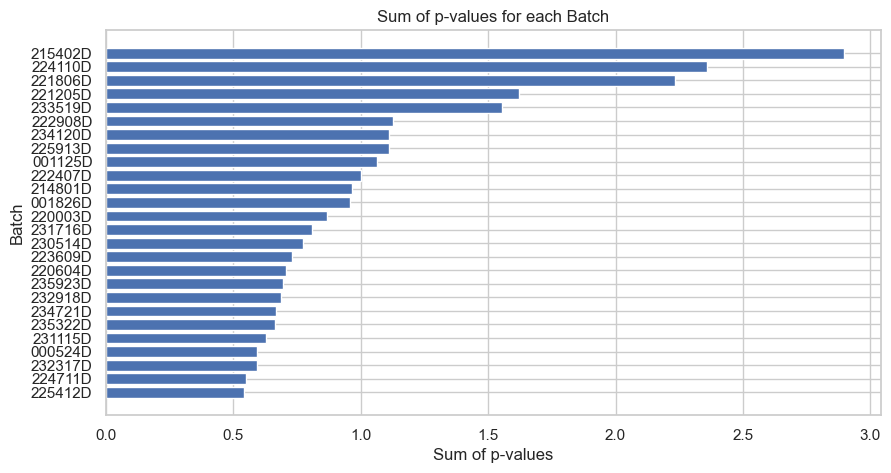

In [10]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 215402D: 3.7054293450199616
- Batch 221806D: 1.7987026076288166
- Batch 233519D: 1.5395524168618497
- Batch 214801D: 1.3737721453380267
- Batch 223609D: 1.3020118661629145
- Batch 220604D: 1.2254856078859664
- Batch 231716D: 1.108810568465982
- Batch 230514D: 1.0806220297565698
- Batch 221205D: 1.0312583378981581
- Batch 234120D: 1.02620533502113
- Batch 224110D: 1.0230789737145698
- Batch 222908D: 1.0003147695967531
- Batch 232317D: 0.9876519584782508
- Batch 231115D: 0.9155717816096417
- Batch 235923D: 0.8764243194762948
- Batch 225913D: 0.8595277778698992
- Batch 225412D: 0.8172420360378589
- Batch 220003D: 0.8081442569426492
- Batch 224711D: 0.8069622186774515
- Batch 001125D: 0.8060423407714453
- Batch 235322D: 0.8029166814977468
- Batch 001826D: 0.8015531499929567
- Batch 234721D: 0.7863655908831024
- Batch 000524D: 0.7691614411278066
- Batch 232918D: 0.7450267242169945
- Batch 222407D: 0.718117882929827


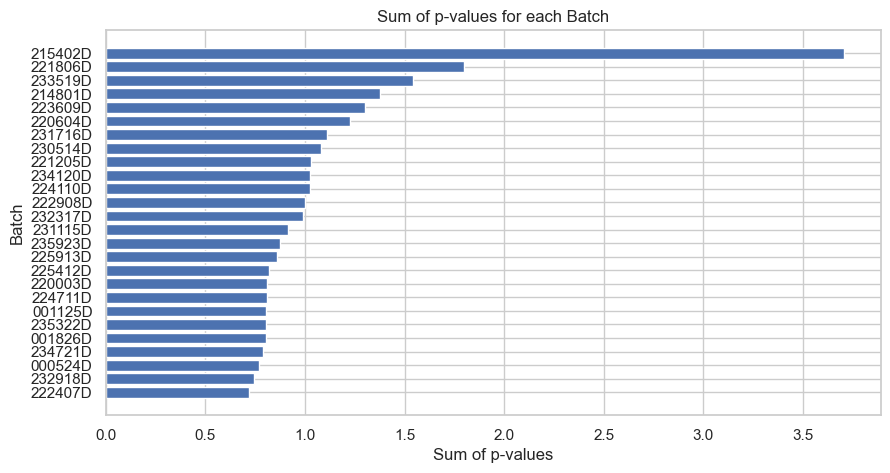

In [11]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

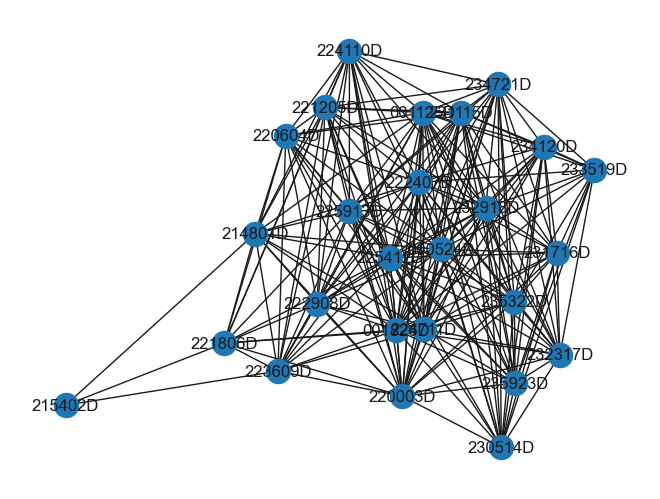

In [12]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes for each batch
for batch in df['Batch'].unique():
    G.add_node(batch)

# Calculate the KS test p-value for each pair of batches and add edges
for batch1, batch2 in itertools.combinations(df['Batch'].unique(), 2):
    pvalue = Batch_ks_value_test(df, batch1, batch2, degree=6)
    if not pd.isna(pvalue) and pvalue > 0.05:
        # Use the inverse of the p-value as the weight (distance)
        G.add_edge(batch1, batch2)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)

plt.show()

In [17]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_xtime = df_02_08.loc[df_02_08.groupby('Batch')['slope'].idxmax()]['xtime']

# Calculer la différence entre le max et le min des xtime
max_diff = max_slope_xtime.max() - max_slope_xtime.min()

print("La plus grande différence des xtime entre les max des pentes des différentes batch est :", round(max_diff*60,3), "secondes")

La plus grande différence des xtime entre les max des pentes des différentes batch est : 2.396 secondes


In [6]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - median_xtime

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 222908D est : 1.347 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 234120D est : 1.289 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 234721D est : 1.289 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 232317D est : 0.648 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 232918D est : 0.589 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 233519D est : 0.469 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 220003D est : 0.285 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 001826D est : 0.269 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 214801D est : 0.198 seconde
La différence de temps entre le max de la pente et la médiane po

In [8]:
round(np.std(max_slope_batch_xtime)*1000,2)

7.77

In [9]:
round(np.std(max_slope_sample_xtime)*1000,2)

12.8